In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

Loading dataset from the inbuilt datasets

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X,columns=iris.feature_names)
df['species'] = iris.target_names[y]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)


Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Logistic Regresssion, KNN and SVM

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
classifier1 = LogisticRegression()
classifier1.fit(X_train,y_train)
classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(X_train,y_train)
classifier3 = SVC(kernel='linear')
classifier3.fit(X_train,y_train)

SVC(kernel='linear')

Accuracy Score

In [7]:
from sklearn.metrics import accuracy_score
models = {'Logistic Regression': classifier1, 'KNN' : classifier2, 'SVM': classifier3}

for name,model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print(f'{name} Accuracy: {acc:.2f}')



Logistic Regression Accuracy: 1.00
KNN Accuracy: 1.00
SVM Accuracy: 1.00


PCA for 2D Visualization
Reduce features to 2D for visualization

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)


Re-split reduced data

In [9]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

Train models on reduced data

In [10]:
models_2d = {
    'Logistic Regression': LogisticRegression().fit(X_train_r, y_train_r),
    'KNN': KNeighborsClassifier(n_neighbors=5).fit(X_train_r, y_train_r),
    'SVM': SVC(kernel='linear').fit(X_train_r, y_train_r)
}

In [ ]:
def plot_decision_boundary_matplotlib(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

In [12]:
def plot_decision_boundary_seaborn(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', edgecolor='k')
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Class')
    plt.show()


Show all decision boundaries using both methods

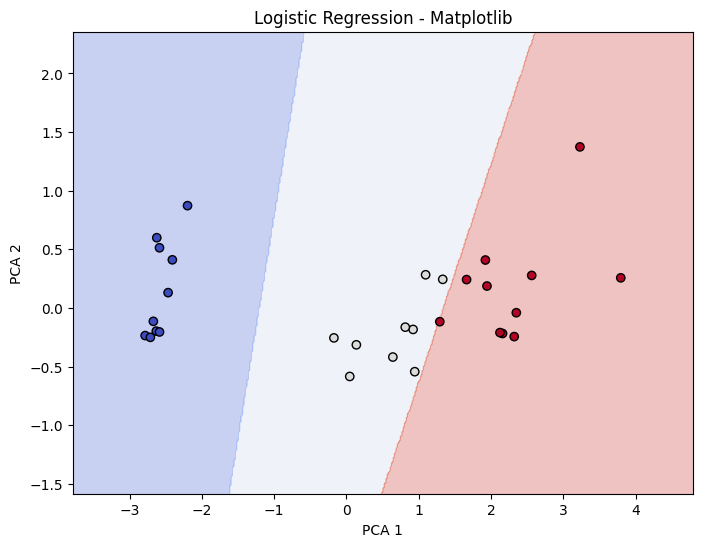

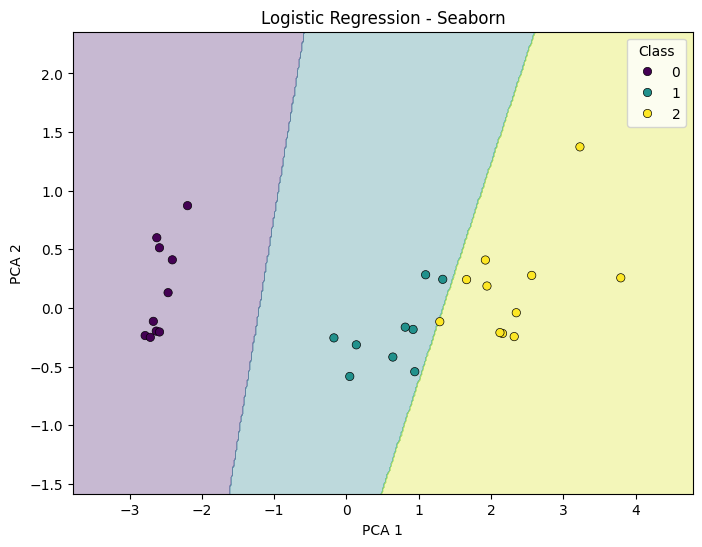

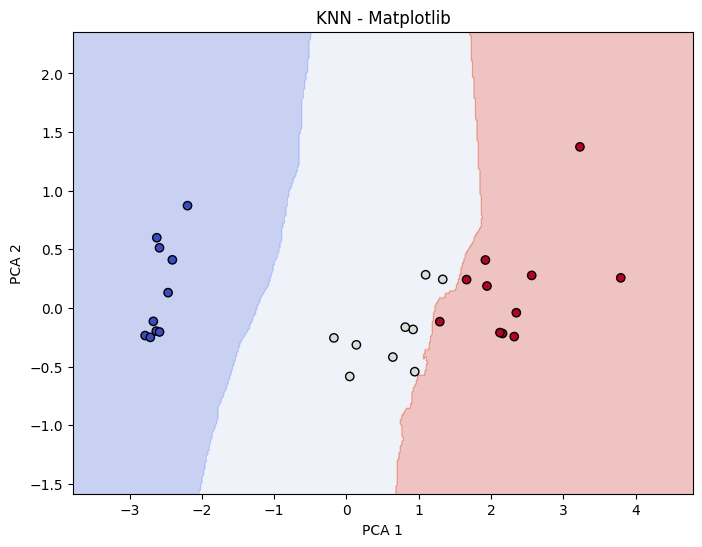

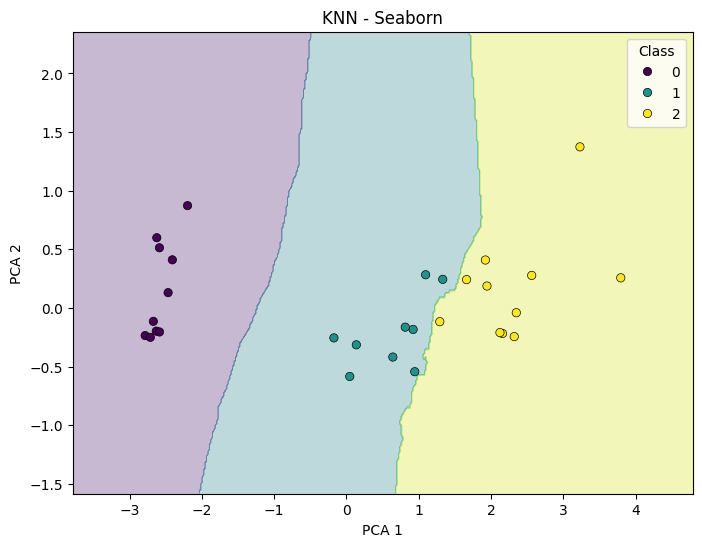

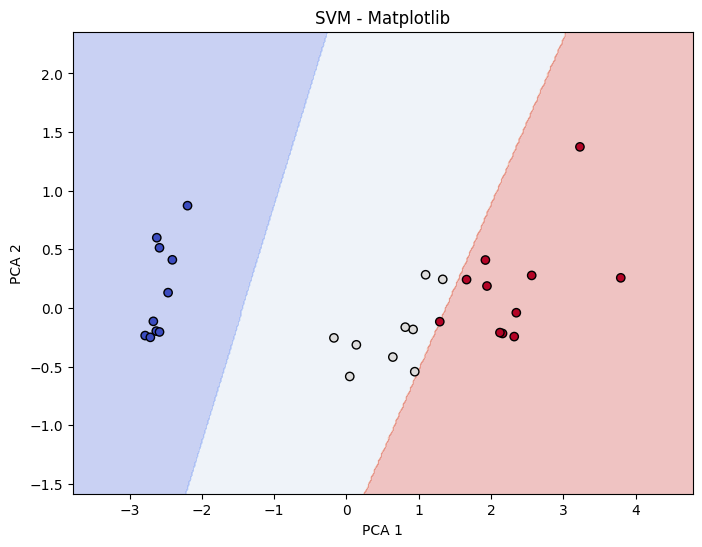

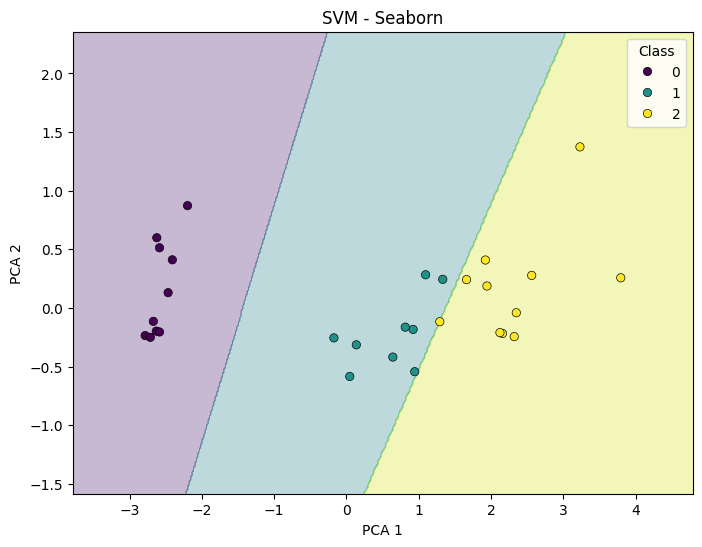

In [13]:
for name, model in models_2d.items():
    plot_decision_boundary_matplotlib(model, X_test_r, y_test_r, f'{name} - Matplotlib')
    plot_decision_boundary_seaborn(model, X_test_r, y_test_r, f'{name} - Seaborn')


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
k_values = range(1, 11)
accuracies = []

print("\nKNN Evaluation with different K values:")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc_k = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc_k)
    print(f"K={k}: Accuracy = {acc_k:.2f}")


KNN Evaluation with different K values:
K=1: Accuracy = 0.93
K=2: Accuracy = 0.97
K=3: Accuracy = 0.97
K=4: Accuracy = 0.97
K=5: Accuracy = 1.00
K=6: Accuracy = 1.00
K=7: Accuracy = 1.00
K=8: Accuracy = 1.00
K=9: Accuracy = 1.00
K=10: Accuracy = 1.00


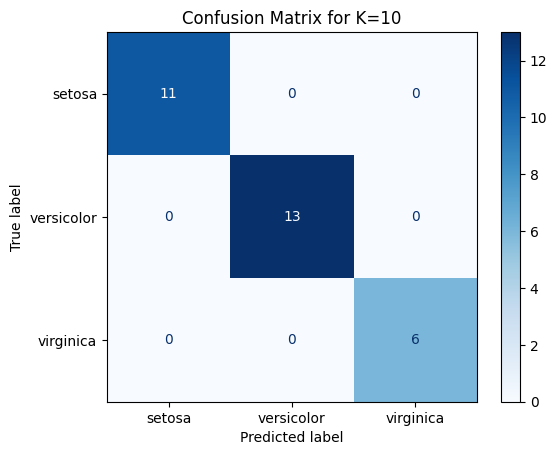

In [16]:
cm = confusion_matrix(y_test, y_pred_k)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for K={k}')
plt.show()

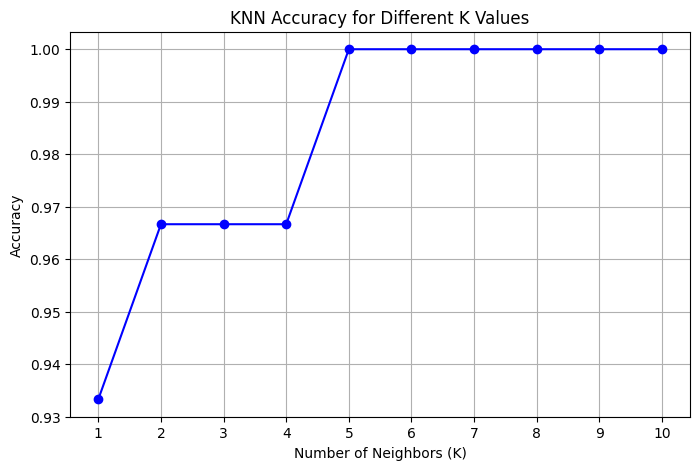

In [17]:
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
